# Linear Regression Implemented Example
## Here We are Implementing Linear Regression on the dataset of insurance pridecting the cost of the insurance
### Importing all the important libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
alpha = 0.0007

### Defining A Function to make a prediction once the model is trained

In [126]:
def predict(A,theta):
    return (np.transpose(A)).dot(theta)

### Defining a function to calculate the cost using Linear regression Cost function
Hypothesis = X*theta . here X is the training set data with m examples and n features in m x n matrix.

In [127]:
def calculateCost(X,Y,theta):
    (m,n) = X.shape
    H = X.dot(theta)
    J = sum((H-Y)**2/2/m)
    return J

### Loading the data from csv using pandas and slicing it making a training set data of 80 % of the data and test set of the remaining 20 % of data.

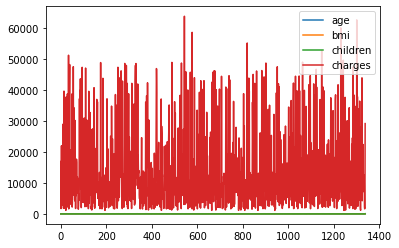

In [128]:
data = pd.read_csv('/home/shivanshu/Desktop/ML_implementation/insurance.csv')
data.plot()
test = data[1070:1337]
test_Y = test['charges']

### converting the data in numpy array having the following features:
* age
* sex (male == 0 and female == 1)
* smoker(0) or non-smoke(1)
* bmi
* #of children

In [129]:
data = data[:1070]
Y = data['charges'].to_numpy()
data = data.replace('female',1)
data = data.replace('male',0)
data = data.replace('yes',1)
data = data.replace('no',0)
data = data.drop("region",axis=1)
data = data.drop("charges",axis=1)
X = data.to_numpy()
(m,n) = X.shape
X = np.hstack((X,X**2))
X = np.c_[np.ones(m),X]

### Randomly initialising theta

In [130]:
# (m,n) = X.shape
Y = Y.reshape(m,1)
theta = np.random.randn(2*n+1,1)

array([[-0.34513328],
       [-0.62444469],
       [-1.10919743],
       [-0.25414671],
       [-0.33722316],
       [-0.81878142],
       [ 0.00590685],
       [ 1.26414601],
       [-1.14280209],
       [ 0.39175574],
       [-0.45774669]])



### Implementing the Gradient Descent

In [131]:
cost = calculateCost(X,Y,theta)
costs = []
for i in range(15000):
    update = ((np.transpose(X.dot(theta)-Y)).dot(X)).reshape(2*n+1,1)*alpha/m
    theta = theta - update
    cost = calculateCost(X,Y,theta)
    costs.append(cost)
    print(cost)
    print(theta)
    if i>2 and costs[-2]<cost:
        break

ValueError: cannot reshape array of size 11 into shape (6,1)

### Plotting the value of cost Function with the #of steps of Gradient Descent

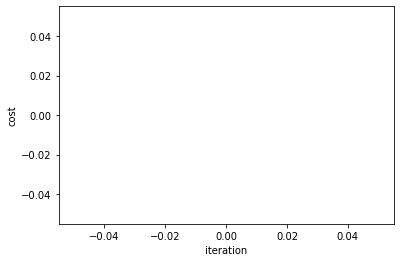

In [132]:

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

### Calculating the value of cost function and theta accurately with the Normalisation

In [133]:
thetaN = np.linalg.pinv((np.transpose(X)).dot(X)).dot((np.transpose(X)).dot(Y))
print(thetaN)
calculateCost(X,Y,thetaN)

[[-1.35779751e+04]
 [-6.68682137e+01]
 [ 1.13497365e+02]
 [ 7.56712798e+02]
 [ 1.33351730e+03]
 [ 1.18454401e+04]
 [ 4.08479714e+00]
 [ 1.13497365e+02]
 [-6.90692670e+00]
 [-2.20692429e+02]
 [ 1.18454401e+04]]


array([18009629.85223832])

### Checking the accuracy of the model over the test set

In [134]:
(m,n) = test.shape
test = test.replace('female',1)
test = test.replace('male',0)
test = test.replace('yes',1)
test = test.replace('no',0)
test = test.drop("region",axis=1)
Xtest = test.to_numpy()



In [135]:
Htest = Xtest.dot(thetaN)
Ytest = test_Y.to_numpy()
Ytest = Ytest.reshape(m,1)
err = sum((Htest-Ytest)**2)/2/m
print(err) #test error

ValueError: shapes (267,6) and (11,1) not aligned: 6 (dim 1) != 11 (dim 0)

### Predict the charges of the insurance with the trained model

In [136]:
age,sex,bmi,children,smoker = 18,1,36.85,0,0
listp = [1,age,sex,bmi,children,smoker]
A = np.array(listp,dtype='float64')
A = np.hstack((A,A**2))
X = np.c_[np.ones(m),X]
A = A.reshape(11,1)
predict(A,thetaN) #it should be 1629.8335

ValueError: shapes (1,6) and (11,1) not aligned: 6 (dim 1) != 11 (dim 0)

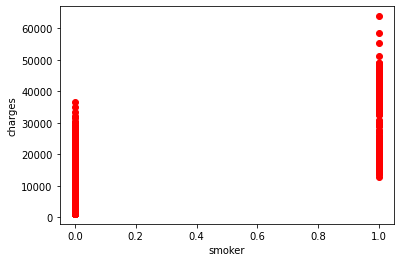

In [137]:
b = 'smoker'
temp = data[b]
plt.plot(temp,Y, 'ro')
plt.ylabel('charges')
plt.xlabel(b)
plt.show()